In [163]:
import pandas as pd
import numpy as np

In [164]:
file_path='carsclean.csv'
data_org=pd.read_csv(file_path)

In [165]:
data_org.head()

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
0,Al Riyadh,Toyota,Rush,2019,Used,"14,999.5",Automatic,Gasoline,White,Cash or Installments,"58,375.0"
1,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"10,000.0"
2,Al Riyadh,Toyota,Camry,2014,Used,"24,999.5",Automatic,Gasoline,White,Installments Only,"58,375.0"
3,Al Riyadh,Ford,Fusion,2010,Used,"200,000.0",Automatic,Gasoline,White,Cash Only,"22,425.4"
4,Al Riyadh,Ford,Taurus,2018,Used,"5,000.0",Automatic,Gasoline,Grey,Cash Only,"22,425.4"


In [166]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 11 columns):
city            560 non-null object
car_maker       560 non-null object
model           560 non-null object
year            560 non-null int64
condition       560 non-null object
kilometers      560 non-null float64
transmission    560 non-null object
fuel            560 non-null object
color           560 non-null object
pay_method      560 non-null object
price           560 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 48.2+ KB


In [167]:
#UCY: Better to run after we transform all columns
data_org.describe()

,year,kilometers,price
count,560.0,560.0,560.0
mean,"2,011.9","120,535.5","37,521.1"
std,3.9,"81,305.8","27,022.6"
min,"2,006.0",0.0,"2,114.0"
25%,"2,008.0","39,999.5","19,000.0"
50%,"2,012.5","149,999.5","27,500.0"
75%,"2,014.2","200,000.0","58,375.0"
max,"2,019.0","200,000.0","100,000.0"


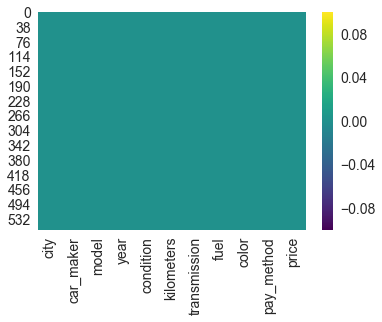

In [170]:
#UCY: No need to do this since we do not have null values
sns.heatmap(data_org.isnull(), cmap='viridis')

In [171]:
#UCY: Some functions that can be utilized during analysis

#UCY: Iterate through columns, print unique values with counts of each (if very long list, no need to show unique values)
def print_val_counts(data):
    print('VALUES DISTRIBUTION')
    excluded_columns = []
    for col in data.columns:
        uniq_vals = list(data[col].unique())
        length_vals = len(uniq_vals)
        if(length_vals < 15):
            print('\t{0} --> {1}'.format(col, length_vals))
            print(data[col].value_counts())
        else:
            excluded_columns.append(col)
    print("EXCLUDED: {0}".format(excluded_columns))

In [172]:
print_val_counts(data_org)

#UCY: My takeaways from this:
#All cars from Riyadh, so it should not be included in our model as it does not add value
#Condition = New should be omitted from our training model since we would like to predict only used car prices
#Kilometers = 0 can be kept since the car might be sold right after purchase, but need to mention in EDA
#All cars use gasoline, so it should not be included in our model as it does not add value



VALUES DISTRIBUTION
	city --> 1
Al Riyadh    560
Name: city, dtype: int64
	car_maker --> 11
Toyota      140
Ford        120
BMW          80
Kia          60
Renault      40
Dodge        20
Suzuki       20
Cadillac     20
Nissan       20
GMC          20
Mazda        20
Name: car_maker, dtype: int64
	year --> 13
2008    100
2014     80
2016     60
2013     60
2007     60
2019     40
2009     40
2018     20
2015     20
2012     20
2011     20
2010     20
2006     20
Name: year, dtype: int64
	condition --> 2
Used    540
New      20
Name: condition, dtype: int64
	kilometers --> 13
200,000.0    220
64,999.5      40
14,999.5      40
5,000.0       40
44,999.5      40
0.0           40
194,999.5     20
174,999.5     20
154,999.5     20
114,999.5     20
144,999.5     20
104,999.5     20
24,999.5      20
Name: kilometers, dtype: int64
	transmission --> 2
Automatic    500
Manual        60
Name: transmission, dtype: int64
	fuel --> 1
Gasoline    560
Name: fuel, dtype: int64
	color --> 7
White     220

In [173]:
#UCY: Ecplanatory Data Analysis 

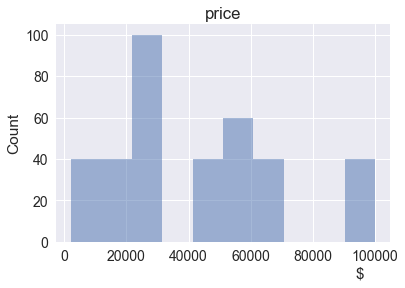

In [241]:
#UCY: Price analysis
pd.options.display.float_format = '{:,.1f}'.format
data_proc[['price']].hist(alpha=0.5,bins=10)
plt.ylabel('Count')
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.set_xlabel('$', x=0.92, ha='right')
plt.show()
#Not much of data for luxury cars; whereas more data for economy class

In [240]:
data_org[data_org['price']<20000]

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
1,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"10,000.0"
9,Al Riyadh,Ford,Expedition,2014,Used,"200,000.0",Automatic,Gasoline,Black,Installments Only,"2,114.0"
15,Al Riyadh,Mazda,3,2013,Used,"154,999.5",Automatic,Gasoline,Green,Cash Only,"16,000.0"
17,Al Riyadh,Kia,Opirus,2008,Used,"5,000.0",Automatic,Gasoline,Grey,Cash Only,"10,000.0"
21,Al Riyadh,Renault,Symbol,2016,Used,"44,999.5",Automatic,Gasoline,Silver,Cash Only,"12,000.0"
22,Al Riyadh,Toyota,Yaris,2009,Used,"200,000.0",Automatic,Gasoline,Green,Cash Only,"11,000.0"
24,Al Riyadh,Kia,Rio,2015,Used,"44,999.5",Automatic,Gasoline,Beige,Cash Only,"10,000.0"
29,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"10,000.0"
37,Al Riyadh,Ford,Expedition,2014,Used,"200,000.0",Automatic,Gasoline,Black,Installments Only,"2,114.0"
43,Al Riyadh,Mazda,3,2013,Used,"154,999.5",Automatic,Gasoline,Green,Cash Only,"16,000.0"


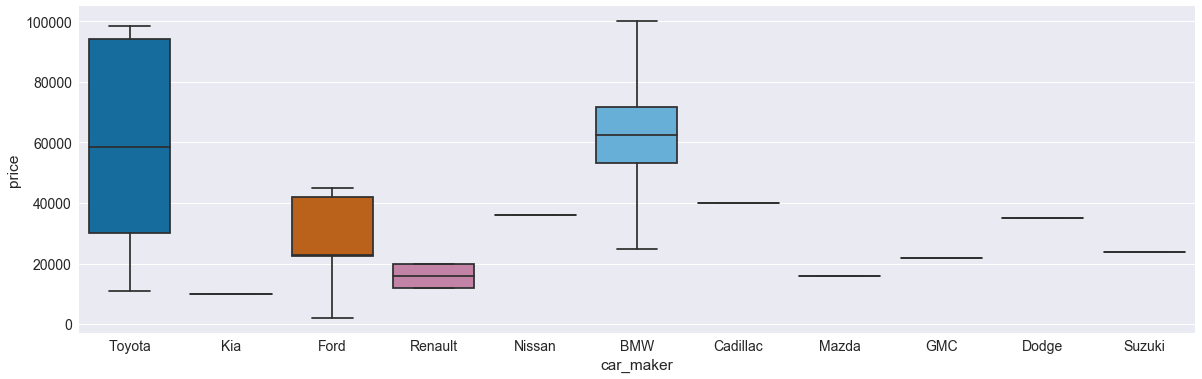

In [175]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20,6))
sns.boxplot(y='price', x='car_maker', 
                 data=data_org, 
                 palette="colorblind")
#UCY: Toyota has the widest range of prices; whereas BMW is the highest segment in general
#UCY: Need to check a sample from other car_makers where we have a single value (mean) rather than a range 

In [176]:
data_org[data_org['car_maker']=='Kia']
#UCY: Does not add value to our model, even can create confusion. So, need to remove it

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
1,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"10,000.0"
17,Al Riyadh,Kia,Opirus,2008,Used,"5,000.0",Automatic,Gasoline,Grey,Cash Only,"10,000.0"
24,Al Riyadh,Kia,Rio,2015,Used,"44,999.5",Automatic,Gasoline,Beige,Cash Only,"10,000.0"
29,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"10,000.0"
45,Al Riyadh,Kia,Opirus,2008,Used,"5,000.0",Automatic,Gasoline,Grey,Cash Only,"10,000.0"
52,Al Riyadh,Kia,Rio,2015,Used,"44,999.5",Automatic,Gasoline,Beige,Cash Only,"10,000.0"
57,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"10,000.0"
73,Al Riyadh,Kia,Opirus,2008,Used,"5,000.0",Automatic,Gasoline,Grey,Cash Only,"10,000.0"
80,Al Riyadh,Kia,Rio,2015,Used,"44,999.5",Automatic,Gasoline,Beige,Cash Only,"10,000.0"
85,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"10,000.0"


In [177]:
#UCY: Will create a function to identify single price car_maker ads and remove them
#data_org.groupby('car_maker')['price'].unique()
data_org[data_org.groupby('car_maker').price.transform('nunique') == 1]
#we will remove the rows with a car maker that has a single price value during feat. eng.

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
1,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"10,000.0"
8,Al Riyadh,Nissan,Patrol,2009,Used,"200,000.0",Manual,Gasoline,White,Cash Only,"36,000.0"
11,Al Riyadh,Cadillac,Escalade,2008,Used,"174,999.5",Automatic,Gasoline,Black,Cash or Installments,"40,000.0"
15,Al Riyadh,Mazda,3,2013,Used,"154,999.5",Automatic,Gasoline,Green,Cash Only,"16,000.0"
17,Al Riyadh,Kia,Opirus,2008,Used,"5,000.0",Automatic,Gasoline,Grey,Cash Only,"10,000.0"
19,Al Riyadh,GMC,Envoy,2007,Used,"200,000.0",Automatic,Gasoline,White,Cash Only,"22,000.0"
23,Al Riyadh,Dodge,Durango,2012,Used,"200,000.0",Automatic,Gasoline,Grey,Cash Only,"35,000.0"
24,Al Riyadh,Kia,Rio,2015,Used,"44,999.5",Automatic,Gasoline,Beige,Cash Only,"10,000.0"
26,Al Riyadh,Suzuki,Other,2013,Used,"14,999.5",Manual,Gasoline,White,Cash Only,"24,000.0"
29,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"10,000.0"


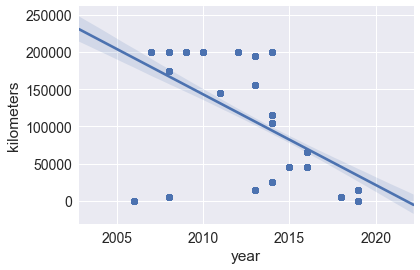

In [246]:
sns.regplot(x="year",y="kilometers", data=data_org)

In [ ]:
#UCY: you can add more plots here...

In [179]:
#UCY: keep the original df as it is and create a copy for processing
data_proc = data_org.copy()

In [180]:
#UCY: Better to have a look at New cars before eliminating the rows
data_proc[data_proc['condition']=='New']
#UCY: It can be seen that they are all same type - maybe a seller is trying to get rid of excessed Toyota Camry he has through this channel

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
6,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"
34,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"
62,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"
90,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"
118,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"
146,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"
174,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"
202,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"
230,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"
258,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"


In [181]:
#UCY: Removing data with condition = new
#UCY: If you would like to keep those in your training set, you can skip this part
data_proc = data_proc[data_proc['condition']!='New']

In [182]:
#UCY: remove any column with a single value 
data_proc = data_proc[data_proc.groupby('car_maker').price.transform('nunique') > 1]

In [183]:
#UCY: Clean up columns that have no impact in the training (only a single value in the column)
data_proc.drop(columns = data_proc.columns[data_proc.nunique() == 1],
    inplace = True)
data_proc.head()

,car_maker,model,year,kilometers,transmission,color,pay_method,price
0,Toyota,Rush,2019,"14,999.5",Automatic,White,Cash or Installments,"58,375.0"
2,Toyota,Camry,2014,"24,999.5",Automatic,White,Installments Only,"58,375.0"
3,Ford,Fusion,2010,"200,000.0",Automatic,White,Cash Only,"22,425.4"
4,Ford,Taurus,2018,"5,000.0",Automatic,Grey,Cash Only,"22,425.4"
5,Renault,Dokker Van,2016,"64,999.5",Manual,White,Cash Only,"20,000.0"


In [184]:
data_proc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 559
Data columns (total 8 columns):
car_maker       360 non-null object
model           360 non-null object
year            360 non-null int64
kilometers      360 non-null float64
transmission    360 non-null object
color           360 non-null object
pay_method      360 non-null object
price           360 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 25.3+ KB


In [185]:
#UCY: Feature Engineering cont. with transformation of values
#UCY: We need to convert strings to numbers
#UCY: We need to get rid of illogical values
#UCY: Will do it column by column
#UCY: We can do some additional analysis and create graphs during this process

In [186]:
data_proc['car_maker_model']=data_proc["car_maker"]+'-'+data_proc["model"]
data_proc.head()

,car_maker,model,year,kilometers,transmission,color,pay_method,price,car_maker_model
0,Toyota,Rush,2019,"14,999.5",Automatic,White,Cash or Installments,"58,375.0",Toyota-Rush
2,Toyota,Camry,2014,"24,999.5",Automatic,White,Installments Only,"58,375.0",Toyota-Camry
3,Ford,Fusion,2010,"200,000.0",Automatic,White,Cash Only,"22,425.4",Ford-Fusion
4,Ford,Taurus,2018,"5,000.0",Automatic,Grey,Cash Only,"22,425.4",Ford-Taurus
5,Renault,Dokker Van,2016,"64,999.5",Manual,White,Cash Only,"20,000.0",Renault-Dokker Van


In [187]:
#UCY: Transform car_maker and model
#UCY: Use dummy variables to convert categorical values into boolean
data_proc['car_maker_model']=data_proc["car_maker"]+'-'+data_proc["model"]
car_maker_model_dummy = pd.get_dummies(data_proc["car_maker_model"], prefix="maker_model")
data_proc = pd.concat([data_proc, car_maker_model_dummy], axis=1)
#UCY: No need for these categorical columns any more
data_proc.drop(columns = ['car_maker'], inplace = True)
data_proc.drop(columns = ['model'], inplace = True)
data_proc.drop(columns = ['car_maker_model'], inplace = True)
data_proc.head()

,year,kilometers,transmission,color,pay_method,price,maker_model_BMW-730,maker_model_BMW-740,maker_model_BMW-X5,maker_model_Ford-Crown Victoria,...,maker_model_Ford-Fusion,maker_model_Ford-Taurus,maker_model_Renault-Dokker Van,maker_model_Renault-Symbol,maker_model_Toyota-Avalon,maker_model_Toyota-Camry,maker_model_Toyota-Fortuner,maker_model_Toyota-Prado,maker_model_Toyota-Rush,maker_model_Toyota-Yaris
0,2019,"14,999.5",Automatic,White,Cash or Installments,"58,375.0",0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2014,"24,999.5",Automatic,White,Installments Only,"58,375.0",0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2010,"200,000.0",Automatic,White,Cash Only,"22,425.4",0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2018,"5,000.0",Automatic,Grey,Cash Only,"22,425.4",0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,2016,"64,999.5",Manual,White,Cash Only,"20,000.0",0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [188]:
#UCY: Transform transmission
#UCY: We are going to use label encoder for assigning a float instead of categorical 

from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()

data_proc['transmission'] = labelencoder.fit_transform(data_proc['transmission'].astype(str))
data_proc.head()

,year,kilometers,transmission,color,pay_method,price,maker_model_BMW-730,maker_model_BMW-740,maker_model_BMW-X5,maker_model_Ford-Crown Victoria,...,maker_model_Ford-Fusion,maker_model_Ford-Taurus,maker_model_Renault-Dokker Van,maker_model_Renault-Symbol,maker_model_Toyota-Avalon,maker_model_Toyota-Camry,maker_model_Toyota-Fortuner,maker_model_Toyota-Prado,maker_model_Toyota-Rush,maker_model_Toyota-Yaris
0,2019,"14,999.5",0,White,Cash or Installments,"58,375.0",0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2014,"24,999.5",0,White,Installments Only,"58,375.0",0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2010,"200,000.0",0,White,Cash Only,"22,425.4",0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2018,"5,000.0",0,Grey,Cash Only,"22,425.4",0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,2016,"64,999.5",1,White,Cash Only,"20,000.0",0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [189]:
#UCY: Transform color
#UCY: Use dummy variables to convert categorical values into boolean
color_dummy = pd.get_dummies(data_proc["color"], prefix="color")
data_proc = pd.concat([data_proc, color_dummy], axis=1)
#UCY: No need for these categorical columns any more
data_proc.drop(columns = ['color'], inplace = True)
data_proc.head()

,year,kilometers,transmission,pay_method,price,maker_model_BMW-730,maker_model_BMW-740,maker_model_BMW-X5,maker_model_Ford-Crown Victoria,maker_model_Ford-Expedition,...,maker_model_Toyota-Fortuner,maker_model_Toyota-Prado,maker_model_Toyota-Rush,maker_model_Toyota-Yaris,color_Black,color_Brown,color_Green,color_Grey,color_Silver,color_White
0,2019,"14,999.5",0,Cash or Installments,"58,375.0",0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2014,"24,999.5",0,Installments Only,"58,375.0",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2010,"200,000.0",0,Cash Only,"22,425.4",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2018,"5,000.0",0,Cash Only,"22,425.4",0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,2016,"64,999.5",1,Cash Only,"20,000.0",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [190]:
#UCY: Transform transmission
#UCY: We are going to use label encoder for assigning a float instead of categorical 
data_proc['pay_method'] = labelencoder.fit_transform(data_proc['pay_method'].astype(str))
data_proc.head()

,year,kilometers,transmission,pay_method,price,maker_model_BMW-730,maker_model_BMW-740,maker_model_BMW-X5,maker_model_Ford-Crown Victoria,maker_model_Ford-Expedition,...,maker_model_Toyota-Fortuner,maker_model_Toyota-Prado,maker_model_Toyota-Rush,maker_model_Toyota-Yaris,color_Black,color_Brown,color_Green,color_Grey,color_Silver,color_White
0,2019,"14,999.5",0,1,"58,375.0",0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2014,"24,999.5",0,2,"58,375.0",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2010,"200,000.0",0,0,"22,425.4",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2018,"5,000.0",0,0,"22,425.4",0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,2016,"64,999.5",1,0,"20,000.0",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [191]:
data_proc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 559
Data columns (total 27 columns):
year                               360 non-null int64
kilometers                         360 non-null float64
transmission                       360 non-null int64
pay_method                         360 non-null int64
price                              360 non-null float64
maker_model_BMW-730                360 non-null uint8
maker_model_BMW-740                360 non-null uint8
maker_model_BMW-X5                 360 non-null uint8
maker_model_Ford-Crown Victoria    360 non-null uint8
maker_model_Ford-Expedition        360 non-null uint8
maker_model_Ford-Explorer          360 non-null uint8
maker_model_Ford-Fusion            360 non-null uint8
maker_model_Ford-Taurus            360 non-null uint8
maker_model_Renault-Dokker Van     360 non-null uint8
maker_model_Renault-Symbol         360 non-null uint8
maker_model_Toyota-Avalon          360 non-null uint8
maker_model_Toyota-Camry   

In [249]:
#UCY: See the correlation bw variables
import seaborn as sns; 
import matplotlib.pyplot as plt

def get_correlations_heatmap(data, size=(25,12)):
    correlations = np.around(data.corr(), decimals=2)
    mask = np.zeros_like(correlations, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=size)
    sns.set(font_scale=1.4)
    sns.heatmap(correlations,
                vmin=-1,
                cmap='coolwarm',
                annot=True,
                mask = mask);
    #plt.xticks(rotation=60)
    plt.show()
    


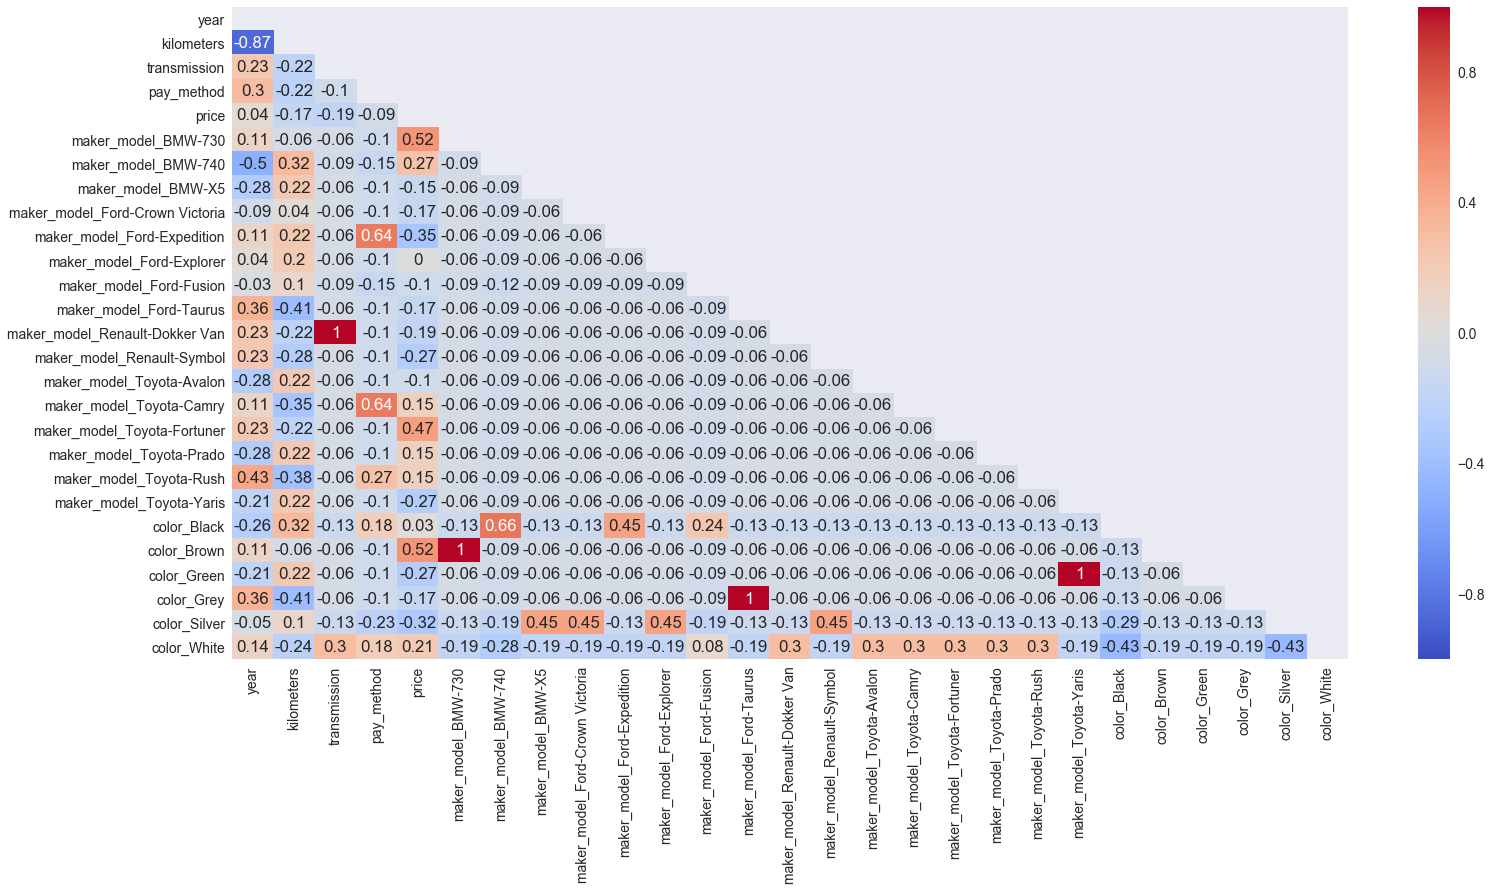

In [250]:
get_correlations_heatmap(data_proc)
#UCY: Some key takeaways
#UCY: kilometers is strongly negative correlated with year --> older cars usually have higher km
#UCY: some models have only a single color, so the color for that car model is fixed (cor = 1)
#UCY: need to check price's correlation with other features

In [196]:
data_proc.describe()

,year,kilometers,transmission,pay_method,price,maker_model_BMW-730,maker_model_BMW-740,maker_model_BMW-X5,maker_model_Ford-Crown Victoria,maker_model_Ford-Expedition,...,maker_model_Toyota-Fortuner,maker_model_Toyota-Prado,maker_model_Toyota-Rush,maker_model_Toyota-Yaris,color_Black,color_Brown,color_Green,color_Grey,color_Silver,color_White
count,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,...,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0
mean,"2,012.3","132,222.0",0.1,0.3,"41,616.1",0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.2,0.4
std,3.8,"74,625.0",0.2,0.7,"27,133.7",0.2,0.3,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.4,0.2,0.2,0.2,0.4,0.5
min,"2,007.0","5,000.0",0.0,0.0,"2,114.0",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,"2,008.0","64,999.5",0.0,0.0,"22,425.4",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,"2,013.5","169,999.5",0.0,0.0,"36,000.0",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,"2,016.0","200,000.0",0.0,0.0,"58,375.0",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,"2,019.0","200,000.0",1.0,2.0,"100,000.0",1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [207]:
#UCY: Start Developing the Model
#UCY: Will try different algorithms and pick the most accurate one
#Libraries for modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE

In [204]:
#UCY: Prepare train and test data
#UCY: will use 30% of data for testing
#UCY: initially taking all reamining columns in our model (can remove some columns for some algorithms later on)
y=data_proc.price
x=data_proc.loc[:, data_proc.columns != 'price']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
x_train = X_train
x_test = X_test 
print(len(y_train), len(y_test))

252 108


In [205]:
#UCY: Start with Linear Regression
# Bulid a new Model
regression = LinearRegression()

# Train the Model
regression.fit(X_train, y_train)

# Predict for training set
y_train_predict = regression.predict(X_train)

# Predict for training set
y_test_predict = regression.predict(X_test)

In [208]:
#UCY: Evaluation of the model

# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= regression.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 3.990855723980232e-10
MAE is 3.4199888071429634e-10
---------------------------------------
The model performance for testing set
RMSE is 4.1233695776154684e-10
MAE is 3.580714325868973e-10
---------------------------------------
The score of model for testing set
Test score 1.0


In [209]:
compare={"Actual": y_test, "Predict": y_test_predict}
pd.DataFrame(compare)

,Actual,Predict
401,"2,114.0","2,114.0"
373,"2,114.0","2,114.0"
541,"2,114.0","2,114.0"
122,"25,000.0","25,000.0"
233,"2,114.0","2,114.0"
483,"45,000.0","45,000.0"
452,"22,425.4","22,425.4"
25,"100,000.0","100,000.0"
292,"23,000.0","23,000.0"
368,"22,425.4","22,425.4"


51


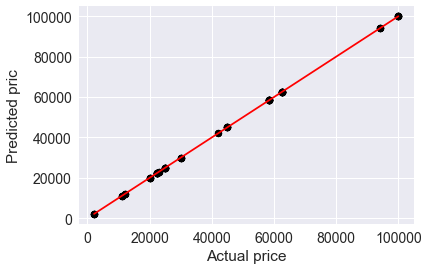

In [216]:
# visualization
idx= np.random.choice(X_test.shape[0])
print(idx)
plt.scatter(y_test, y_test_predict,  color='black')
plt.xlabel('Actual price')
plt.ylabel('Predicted pric')
plt.plot([data_proc['price'].min(), data_proc['price'].max()], [data_proc['price'].min(), data_proc['price'].max()], color='red')
plt.show()
#UCY: Data is overfitting

In [218]:
# Save the model

import pickle
filename='linear_model.pkl'
pickle.dump(regression, open(filename, 'wb')) # w = write b ==binary mode

In [219]:
# Load the saved model
model_load = pickle.load(open(filename, 'rb')) # r = read b ==binary mode
model_load.coef_

array([-1.82707879e+03, -2.24796685e-01, -1.85318127e+04, -1.00682995e+04,
        2.74919834e+04,  1.08132127e+04,  1.04553769e+03, -7.83715601e+03,
       -1.66466367e+04,  2.60568358e+04, -1.52530332e+04, -2.00049205e+04,
       -1.85318127e+04, -3.21814305e+04, -1.13325908e+04,  8.80194878e+03,
        3.69363747e+04,  1.70424092e+04,  5.62107634e+03, -1.20217983e+04,
        1.29890331e+04,  2.74919834e+04, -1.20217983e+04, -2.00049205e+04,
       -1.29162131e+04,  4.46191539e+03])

In [220]:
# y-intercept b0  {𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4+b0}
model_load.intercept_

3750604.214795792

In [221]:
data_proc.columns

Index(['year', 'kilometers', 'transmission', 'pay_method', 'price',
       'maker_model_BMW-730', 'maker_model_BMW-740', 'maker_model_BMW-X5',
       'maker_model_Ford-Crown Victoria', 'maker_model_Ford-Expedition',
       'maker_model_Ford-Explorer', 'maker_model_Ford-Fusion',
       'maker_model_Ford-Taurus', 'maker_model_Renault-Dokker Van',
       'maker_model_Renault-Symbol', 'maker_model_Toyota-Avalon',
       'maker_model_Toyota-Camry', 'maker_model_Toyota-Fortuner',
       'maker_model_Toyota-Prado', 'maker_model_Toyota-Rush',
       'maker_model_Toyota-Yaris', 'color_Black', 'color_Brown', 'color_Green',
       'color_Grey', 'color_Silver', 'color_White'],
      dtype='object')

In [222]:
data_proc.head()

,year,kilometers,transmission,pay_method,price,maker_model_BMW-730,maker_model_BMW-740,maker_model_BMW-X5,maker_model_Ford-Crown Victoria,maker_model_Ford-Expedition,...,maker_model_Toyota-Fortuner,maker_model_Toyota-Prado,maker_model_Toyota-Rush,maker_model_Toyota-Yaris,color_Black,color_Brown,color_Green,color_Grey,color_Silver,color_White
0,2019,"14,999.5",0,1,"58,375.0",0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2014,"24,999.5",0,2,"58,375.0",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2010,"200,000.0",0,0,"22,425.4",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2018,"5,000.0",0,0,"22,425.4",0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,2016,"64,999.5",1,0,"20,000.0",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [224]:
print_val_counts(data_proc)

VALUES DISTRIBUTION
	year --> 10
2014    80
2016    60
2008    60
2007    40
2019    20
2018    20
2013    20
2011    20
2010    20
2009    20
Name: year, dtype: int64
	kilometers --> 10
200,000.0    160
64,999.5      40
14,999.5      20
114,999.5     20
144,999.5     20
104,999.5     20
24,999.5      20
194,999.5     20
44,999.5      20
5,000.0       20
Name: kilometers, dtype: int64
	transmission --> 2
0    340
1     20
Name: transmission, dtype: int64
	pay_method --> 3
0    300
2     40
1     20
Name: pay_method, dtype: int64
	price --> 14
58,375.0     60
22,425.4     40
62,500.0     40
11,000.0     20
100,000.0    20
94,000.0     20
42,000.0     20
12,000.0     20
25,000.0     20
30,000.0     20
45,000.0     20
23,000.0     20
2,114.0      20
20,000.0     20
Name: price, dtype: int64
	maker_model_BMW-730 --> 2
0    340
1     20
Name: maker_model_BMW-730, dtype: int64
	maker_model_BMW-740 --> 2
0    320
1     40
Name: maker_model_BMW-740, dtype: int64
	maker_model_BMW-X5 --> 2
0    

In [225]:
print_val_counts(data_org)

VALUES DISTRIBUTION
	city --> 1
Al Riyadh    560
Name: city, dtype: int64
	car_maker --> 11
Toyota      140
Ford        120
BMW          80
Kia          60
Renault      40
Dodge        20
Suzuki       20
Cadillac     20
Nissan       20
GMC          20
Mazda        20
Name: car_maker, dtype: int64
	year --> 13
2008    100
2014     80
2016     60
2013     60
2007     60
2019     40
2009     40
2018     20
2015     20
2012     20
2011     20
2010     20
2006     20
Name: year, dtype: int64
	condition --> 2
Used    540
New      20
Name: condition, dtype: int64
	kilometers --> 13
200,000.0    220
64,999.5      40
14,999.5      40
5,000.0       40
44,999.5      40
0.0           40
194,999.5     20
174,999.5     20
154,999.5     20
114,999.5     20
144,999.5     20
104,999.5     20
24,999.5      20
Name: kilometers, dtype: int64
	transmission --> 2
Automatic    500
Manual        60
Name: transmission, dtype: int64
	fuel --> 1
Gasoline    560
Name: fuel, dtype: int64
	color --> 7
White     220

In [233]:
data_proc.columns

Index(['year', 'kilometers', 'transmission', 'pay_method', 'price',
       'maker_model_BMW-730', 'maker_model_BMW-740', 'maker_model_BMW-X5',
       'maker_model_Ford-Crown Victoria', 'maker_model_Ford-Expedition',
       'maker_model_Ford-Explorer', 'maker_model_Ford-Fusion',
       'maker_model_Ford-Taurus', 'maker_model_Renault-Dokker Van',
       'maker_model_Renault-Symbol', 'maker_model_Toyota-Avalon',
       'maker_model_Toyota-Camry', 'maker_model_Toyota-Fortuner',
       'maker_model_Toyota-Prado', 'maker_model_Toyota-Rush',
       'maker_model_Toyota-Yaris', 'color_Black', 'color_Brown', 'color_Green',
       'color_Grey', 'color_Silver', 'color_White'],
      dtype='object')

In [251]:
# use the saved model for prediction
import os

# Recall the features are ['bedrooms', 'bathrooms','sqft_living', 'grade']

inputs = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#[2019, 14999.5,0,1]
year = input('''Enter the year (4 digits)
                            RESPONSE: ''')
inputs[0] = np.int64(year)
kilometers = input('''Enter the kilometers (floating number)
                            RESPONSE: ''')
inputs[1] = float(kilometers)
transmission = input('''Enter the transmission type:
                            Automatic = 0; 
                            Manual = 1;
                            RESPONSE: ''')
inputs[2] = np.int64(transmission)
payment_method = input('''Enter the pay method:
                            Cash Only = 0; 
                            Cash or Installments = 1; 
                            Installments Only = 2;
                            RESPONSE: ''')
inputs[3] = np.int64(payment_method)
car_maker_model = input('''Enter the car maker and model: 
                            BMW-730=				1000000000000000;
                            BMW-740=				0100000000000000;
                            BMW-X5=					0010000000000000;
                            Ford-Crown Victoria= 	0001000000000000;
                            Ford-Expedition=		0000100000000000;
                            Ford-Explorer=			0000010000000000;
                            Ford-Fusion=			0000001000000000;
                            Ford-Taurus=			0000000100000000;
                            Renault-Dokker Van=		0000000010000000;
                            Renault-Symbol=			0000000001000000;
                            Toyota-Avalon=			0000000000100000;
                            Toyota-Camry=			0000000000010000;
                            Toyota-Fortuner=		0000000000001000;
                            Toyota-Prado=			0000000000000100;
                            Toyota-Rush=			0000000000000010;
                            Toyota-Yaris=			0000000000000001;
                            RESPONSE: ''')
i=4
for val in car_maker_model:
    inputs[i]=np.int64(val)
    i += 1
    
color = input('''Enter the color:
                            Black=	100000;
                            Brown=	010000;
                            Green=	001000;
                            Grey=	000100;
                            Silver=	000010;
                            White=	000001;
                            RESPONSE: ''')
for val in color:
    inputs[i]=np.int64(val)
    i += 1
    
print(inputs)

predicted_price = model_load.predict(np.array( [inputs,]))
print("The predicted price is : {} $ ".format(predicted_price[0].round(2)))

Enter the year (4 digits)
                            RESPONSE: 2019
Enter the kilometers (floating number)
                            RESPONSE: 14999.5
Enter the transmission type:
                            Automatic = 0; 
                            Manual = 1;
                            RESPONSE: 0
Enter the pay method:
                            Cash Only = 0; 
                            Cash or Installments = 1; 
                            Installments Only = 2;
                            RESPONSE: 1
Enter the car maker and model: 
                            BMW-730=				1000000000000000;
                            BMW-740=				0100000000000000;
                            BMW-X5=					0010000000000000;
                            Ford-Crown Victoria= 	0001000000000000;
                            Ford-Expedition=		0000100000000000;
                            Ford-Explorer=			0000010000000000;
                            Ford-Fusion=			0000001000000000;
                   